In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

In [4]:
himm_func_call_cnt = 0
himm_grad_call_cnt = 0

def himmelblau_func(x):
  global himm_func_call_cnt
  himm_func_call_cnt += 1
  return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def himmelblau_grad(x):
  global himm_grad_call_cnt
  himm_grad_call_cnt += 1
  dx = 2*(2*x[0]*(x[0]**2 + x[1] - 11) + x[0] + x[1]**2 - 7) 
  dy = 2*(x[0]**2 + 2*x[1]*(x[0] + x[1]**2 -7) + x[1] - 11)
  return np.array([dx, dy])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


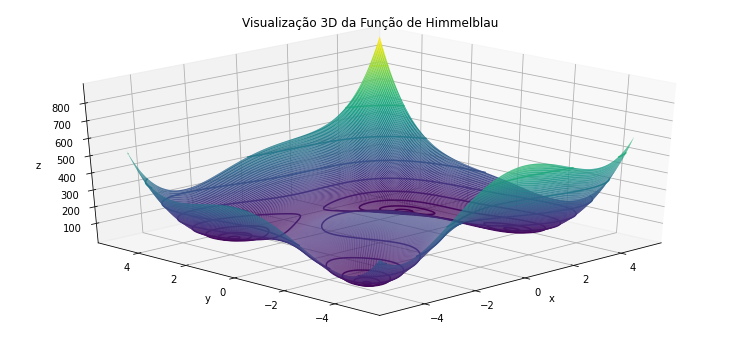

In [14]:
fig = plt.figure(figsize=(13,6))
ax = plt.axes(projection="3d") 
x_vals = np.linspace(-5, 5, 250)
y_vals = np.linspace(-5, 5, 250)
X, Y = np.meshgrid(x_vals, y_vals)
Z = himmelblau_func(X,Y)


plt.contour(X,Y,Z,np.arange(10)**3)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#plt.plot(*min_global,rosenbrock_func(*min_global), 'r*', markersize=10)

plt.title('Visualização 3D da Função de Himmelblau')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(30, 225)

plt.show()

In [58]:
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)
    
def visualize_opt(func, ps):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = func(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))    
    ps = np.array(ps)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
    plt.plot(ps[:, 0], ps[:, 1], '-ro')
    plt.subplot(122)
    plt.semilogy(range(len(ps)), func(ps.T))
    pass

# Conjugado gradiente

In [54]:
ps = [[4, 4]]

opt_res = opt.minimize(himmelblau_func, [4, 4], method="CG", jac=himmelblau_grad, callback=reporter) 

print("Ponto minimo: ", opt_res.x)
print("Valor da função : ", opt_res.fun)
print("Chamadas func : ", opt_res.nfev)
print("Chamadas grad : ", opt_res.njev)


Ponto minimo:  [3. 2.]
Valor da função :  8.490750396096654e-21
Chamadas func :  17
Chamadas grad :  17


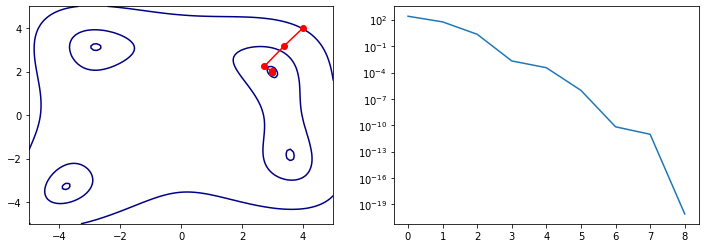

In [59]:
visualize_opt(himmelblau_func,ps)

## DG com busca em linha

In [60]:
def descida_grad(func,func_grad,tol,init,maxpassos, callback = lambda x: x):
    
    print(init)
    
    f_old = func(init)   
    dx = func_grad(init)

    res = opt.line_search(func, func_grad,init,-dx)
    
    x_next =  init - res[0]*dx    
    f_new = func(x_next)
    
    l0_gd = [init[0],x_next[0]]
    l1_gd = [init[1],x_next[1]]
    f_values = [f_old,f_new]
    
    step = 1
    while (step < maxpassos) and (abs(f_new - f_old) >= tol):
        dx = func_grad(x_next)
        res = opt.line_search(func, func_grad,x_next, -dx)
        
        x_next =  x_next - res[0]*dx 
        
        f_old = f_new
        f_new = func(x_next)

        step = step + 1
        
        l0_gd.append(x_next[0])
        l1_gd.append(x_next[1])
        f_values.append(f_new) 
        
        callback(x_next)

    return l0_gd,l1_gd,f_values

In [61]:
ps = [[4, 4]]

tol = 1.0e-5
himm_func_call_cnt = 0
himm_grad_call_cnt = 0

gd_x1_lr3,gd_x2_lr3, gd_func_lr3 = descida_grad(himmelblau_func,himmelblau_grad,tol,np.array([4.0,4.0]),5000,callback=reporter )

[4. 4.]


-3.7792348289132174 -3.2831080883679027 4.3244826049285864e-07
88 33


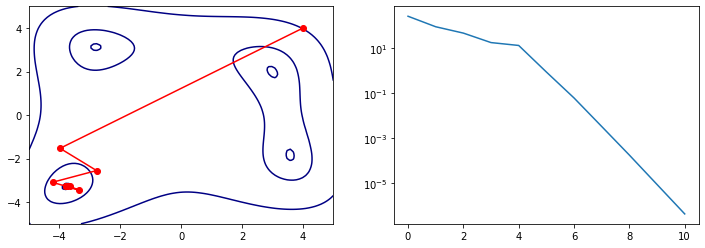

In [62]:
print(gd_x1_lr3[-1],gd_x2_lr3[-1],gd_func_lr3[-1])
print(himm_func_call_cnt,himm_grad_call_cnt)
visualize_opt(himmelblau_func,ps)

## Nelder-Mead

Ponto minimo:  [ 3.58441449 -1.84811588]
Valor da função :  1.0686566996168641e-08
Chamadas func :  77


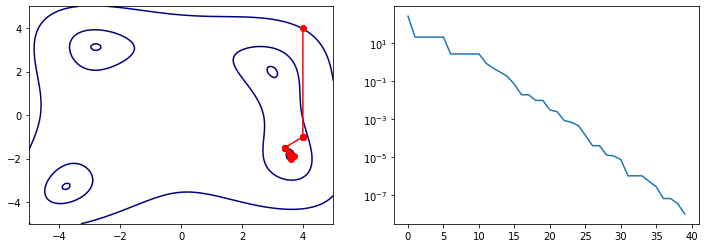

In [64]:
ini_simplex = np.array([[-4.0,-4.0],[-4.0,1.0],[4.0,-1.0]])
ps = [[4, 4]]

opt_res = opt.minimize(himmelblau_func, [0,0] ,method="Nelder-Mead",callback=reporter, options={'initial_simplex': ini_simplex}) 

print("Ponto minimo: ", opt_res.x)
print("Valor da função : ", opt_res.fun)
print("Chamadas func : ", opt_res.nfev)

visualize_opt(himmelblau_func,ps)

# BFGS

## Passando gradiente

Ponto minimo:  [2.99999986 2.00000019]
Valor da função :  8.287611044190847e-13
Chamadas func :  10
10


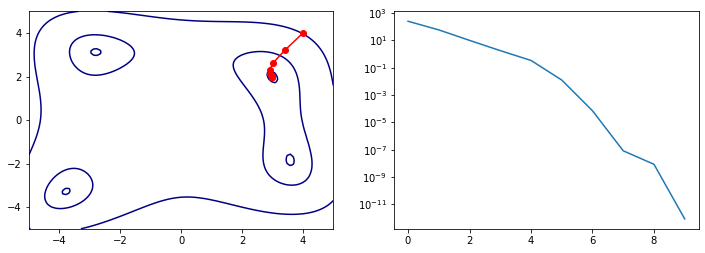

In [65]:
himm_grad_call_cnt = 0
ps = [[4, 4]]

opt_res = opt.minimize(himmelblau_func, [4,4] ,method="L-BFGS-B",jac=himmelblau_grad,callback=reporter) 

print("Ponto minimo: ", opt_res.x)
print("Valor da função : ", opt_res.fun)
print("Chamadas func : ", opt_res.nfev)

print(himm_grad_call_cnt)
visualize_opt(himmelblau_func,ps)

## Sem gradiente

In [68]:
himm_grad_call_cnt = 0
ps = [[4, 4]]

opt_res = opt.minimize(himmelblau_func, [4,4] ,method="L-BFGS-B",callback=reporter) 

print("Ponto minimo: ", opt_res.x)
print("Valor da função : ", opt_res.fun)
print("Chamadas func : ", opt_res.nfev)

print(himm_grad_call_cnt)

Ponto minimo:  [2.99999985 2.00000019]
Valor da função :  8.50224355154359e-13
Chamadas func :  30
0


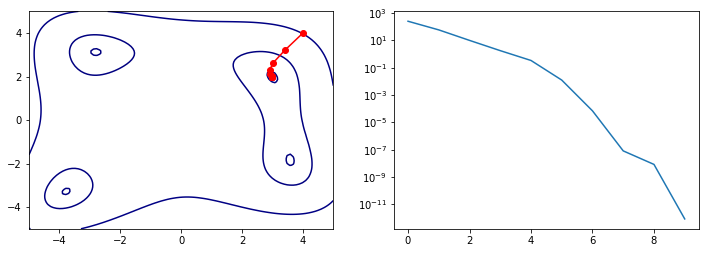

In [69]:
visualize_opt(himmelblau_func,ps)

## NEWOA ou BOBYQA

In [71]:
!pip install Py-BOBYQA



  Created wheel for Py-BOBYQA: filename=Py_BOBYQA-1.3-py3-none-any.whl size=42641 sha256=3569d9fc2341d3a3d9d940892ba8dd8cbbed8bd96749662eaa686ce776b6c42a
  Stored in directory: /home/jorgehs/.cache/pip/wheels/91/0f/c7/0e0a0055a184c9a71bb90efd8b3522fecb0a6284be81d84b70
Successfully built Py-BOBYQA


In [73]:
import pybobyqa

soln = pybobyqa.solve(himmelblau_func, [4,4])

print(soln)
print(soln.diagnostic_info )

****** Py-BOBYQA Results ******
Solution xmin = [3. 2.]
Objective value f(xmin) = 1.287703555e-21
Needed 58 objective evaluations (at 58 points)
Approximate gradient = [6.40527549e-09 5.63832659e-08]
Approximate Hessian = [[73.79866528 20.17722326]
 [20.17722326 34.16328251]]
Exit flag = 0
Success: rho has reached rhoend
******************************

None


In [74]:
print(soln.nx )

58
